In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

In [ ]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
print(dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_data= pd.DataFrame(dataset['data'], columns = dataset.feature_names) 
iris_data['target'] = dataset.target # target 붙이기
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_data.iloc[:,-1].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
iris_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_data = iris_data.drop(columns = ['target'])
y_data = iris_data['target']

print(X_data.shape)
print(y_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3)

print("___After split___")
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(150, 4)
(150,)
___After split___
(105, 4) (45, 4)
(105,) (45,)


# Entropy

In [ ]:
model = tree.DecisionTreeClassifier(criterion = 'entropy',
                     max_depth = None, max_leaf_nodes = None,
                     min_samples_split = 2, min_samples_leaf = 1, max_features = None)

model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# prediction
prediction = model.predict(x_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.38      0.40      0.39        15
           1       0.29      0.31      0.30        16
           2       0.50      0.43      0.46        14

    accuracy                           0.38        45
   macro avg       0.39      0.38      0.38        45
weighted avg       0.39      0.38      0.38        45



precision = 정밀도 ; 모델에서 true인 데이터가 실제로 true인 경우

recall = 재현율 ; 실제로 true인 데이터를 모델에서 true라고 하는 경우

f1 score = precision , recall 의 조화 평균

reference) https://eunsukimme.github.io/ml/2019/10/21/Accuracy-Recall-Precision-F1-score/

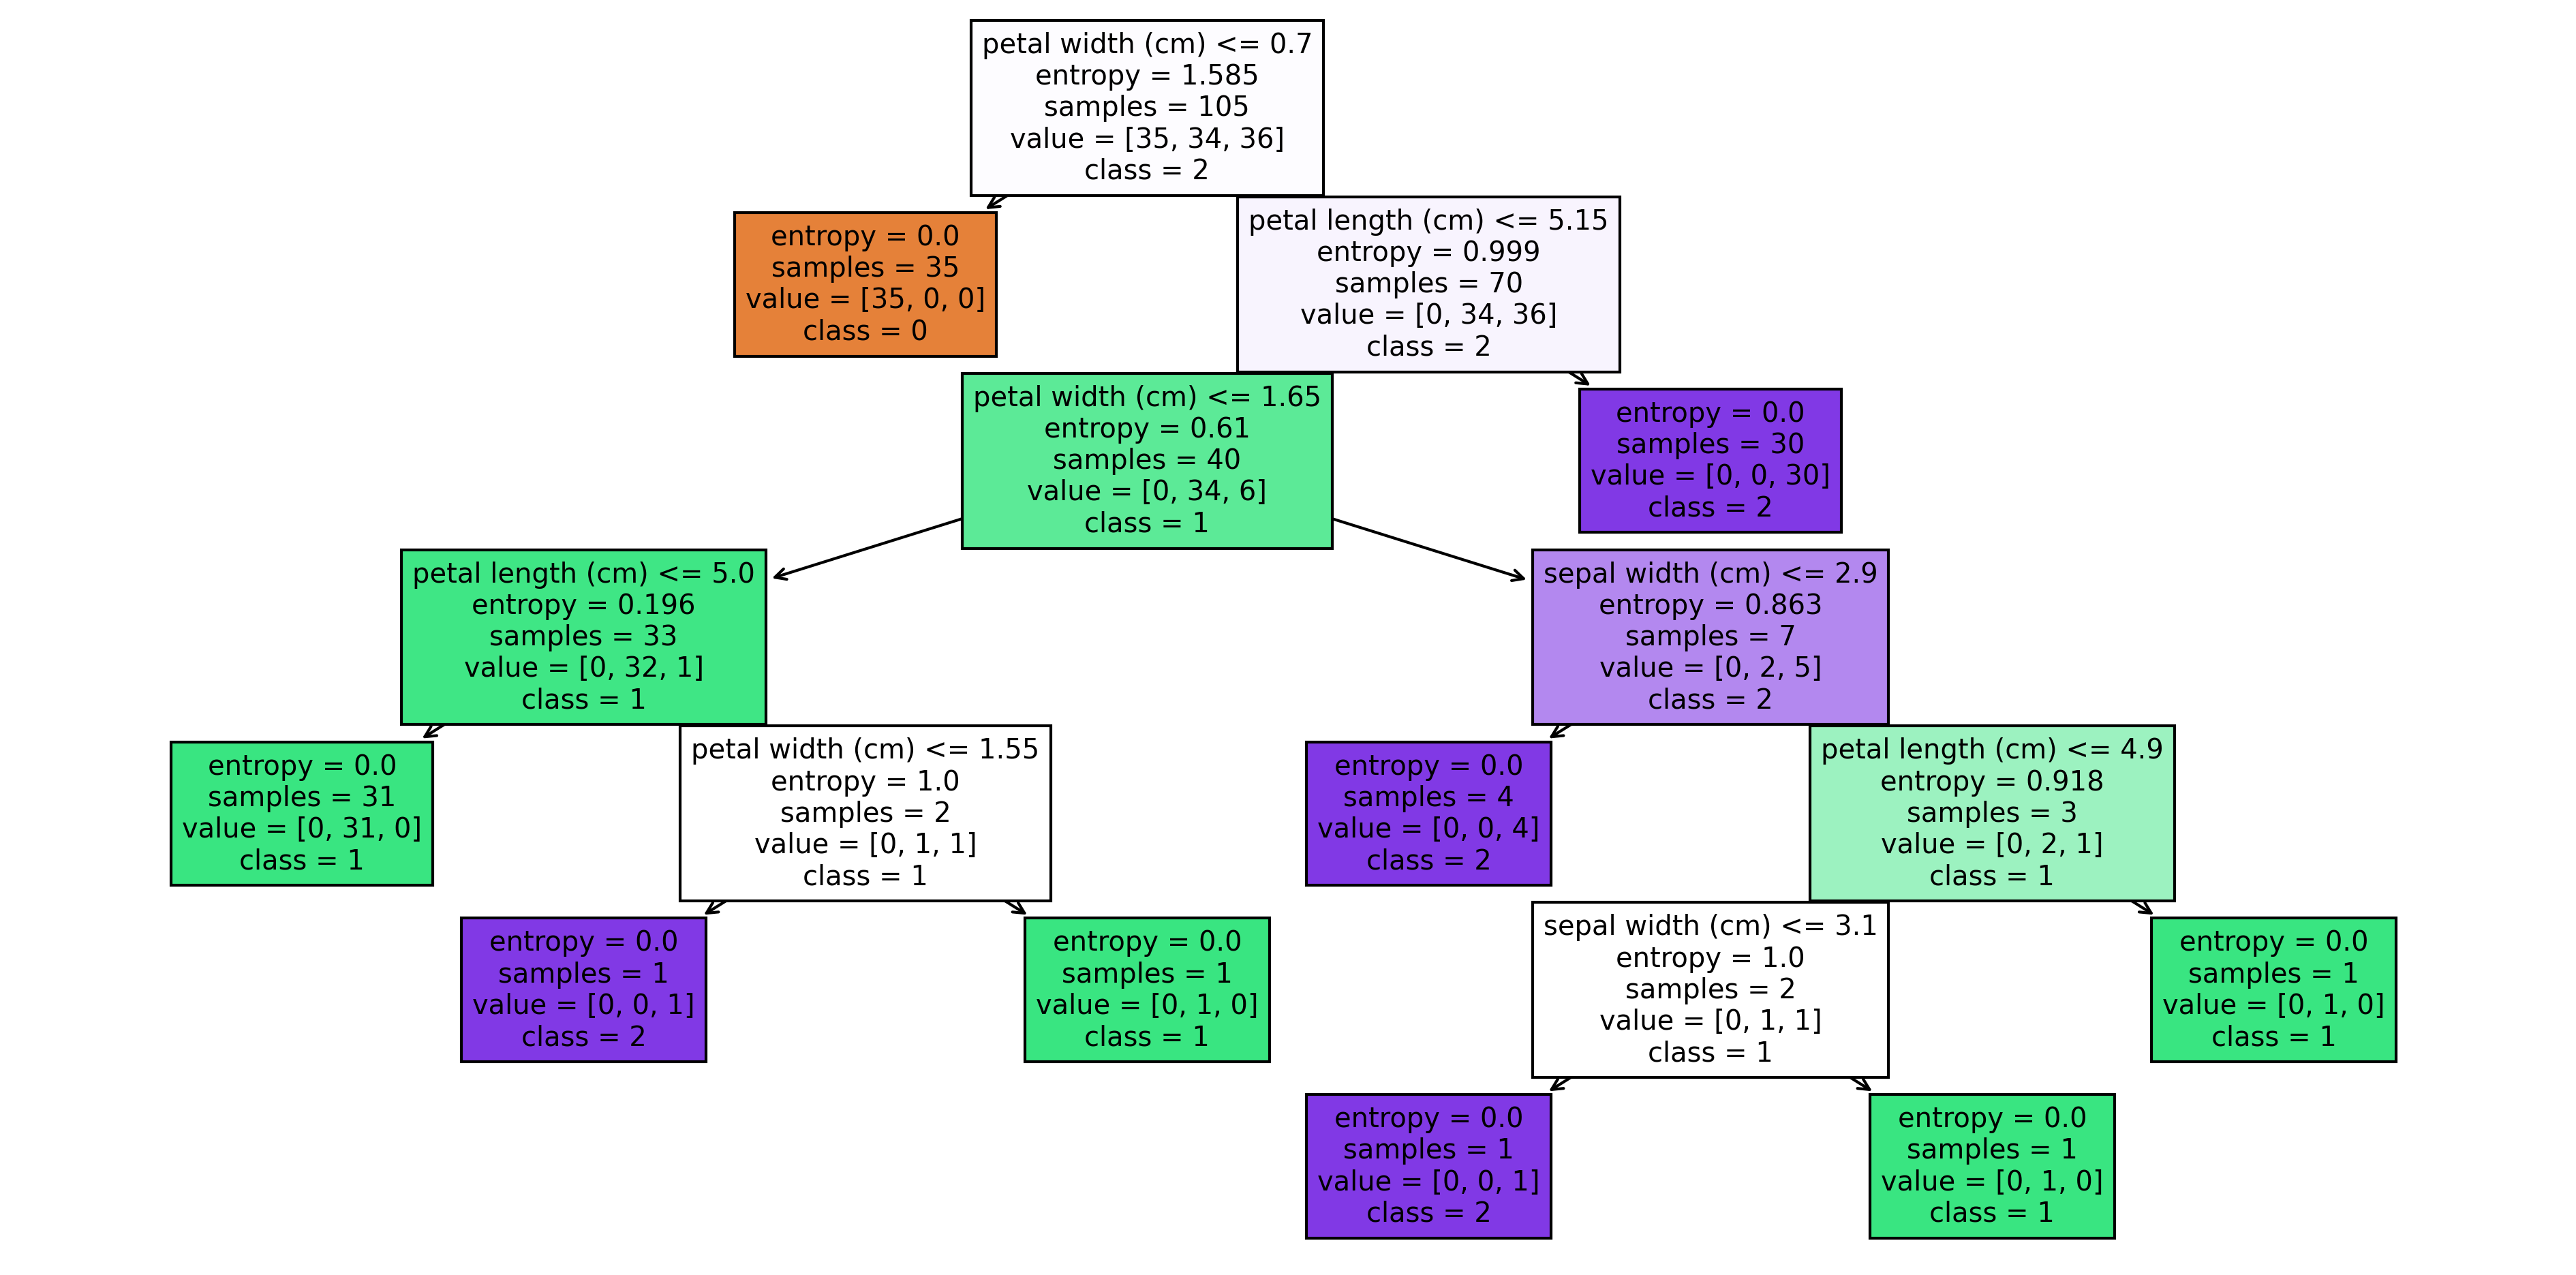

In [ ]:
features = iris_data.columns
target = ['0','1','2']

fig, axes = plt.subplots(nrows=1, ncols = 1, figsize = (16,8),dpi = 300)

tree.plot_tree(model, 
              feature_names = features,
              class_names = target,
              filled = True)

fig.savefig('imagename.png')

# Gini

In [ ]:
model2 = tree.DecisionTreeClassifier(criterion = 'gini',
                     max_depth = None, max_leaf_nodes = None,
                     min_samples_split = 2, min_samples_leaf = 1, max_features = None)

model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# prediction
prediction2 = model2.predict(X_test)

print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



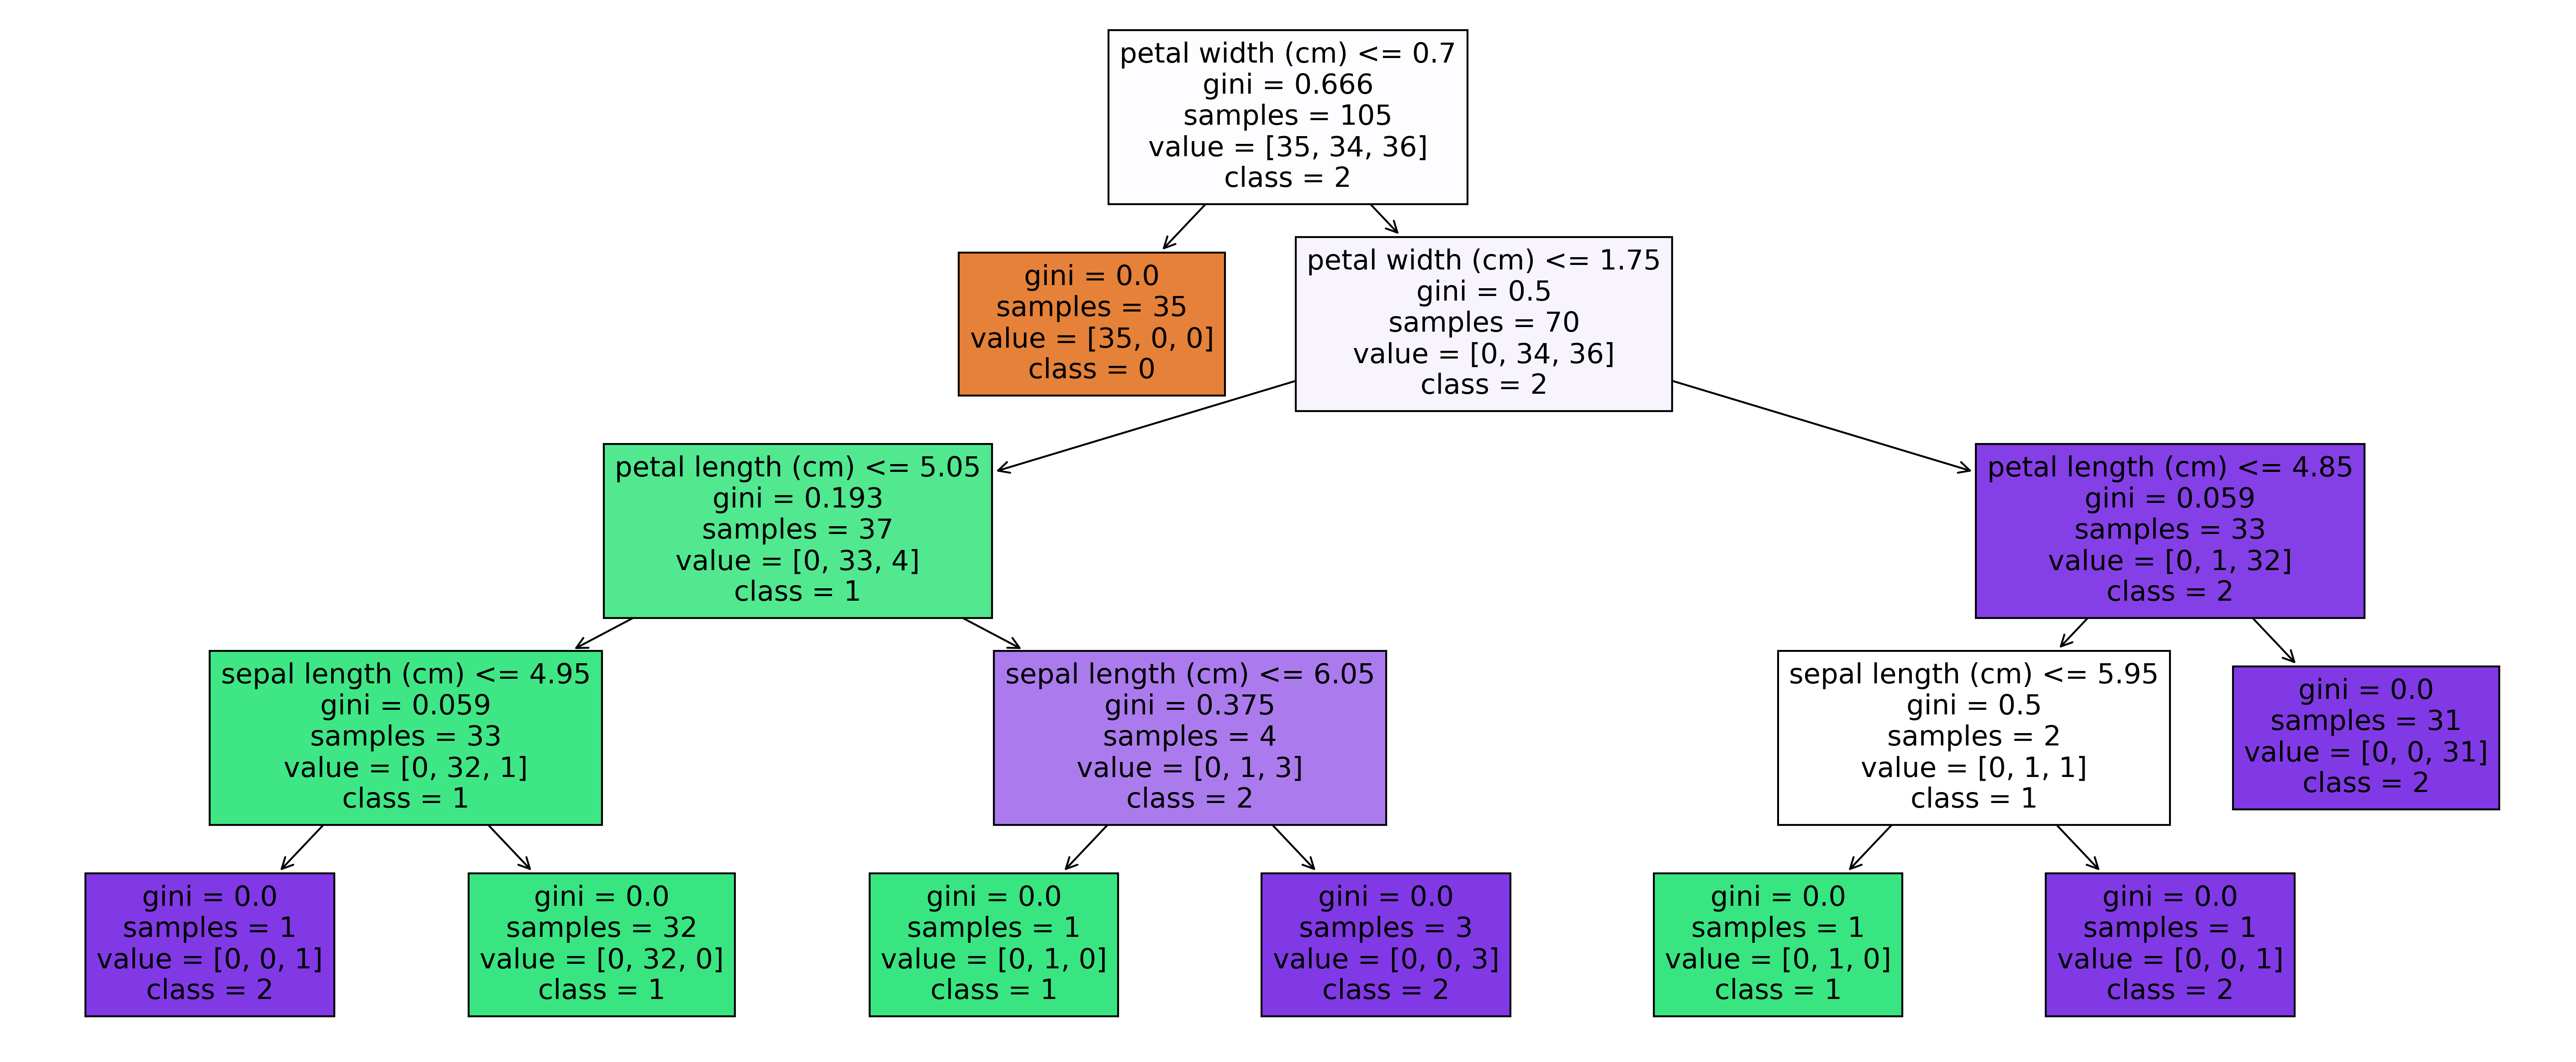

In [ ]:
features = iris_data.columns
target = ['0','1','2']

fig, axes = plt.subplots(nrows=1, ncols = 1, figsize = (24,10),dpi = 300)

tree.plot_tree(model2, 
              feature_names = features,
              class_names = target,
              filled = True)

fig.savefig('imagename2.png')